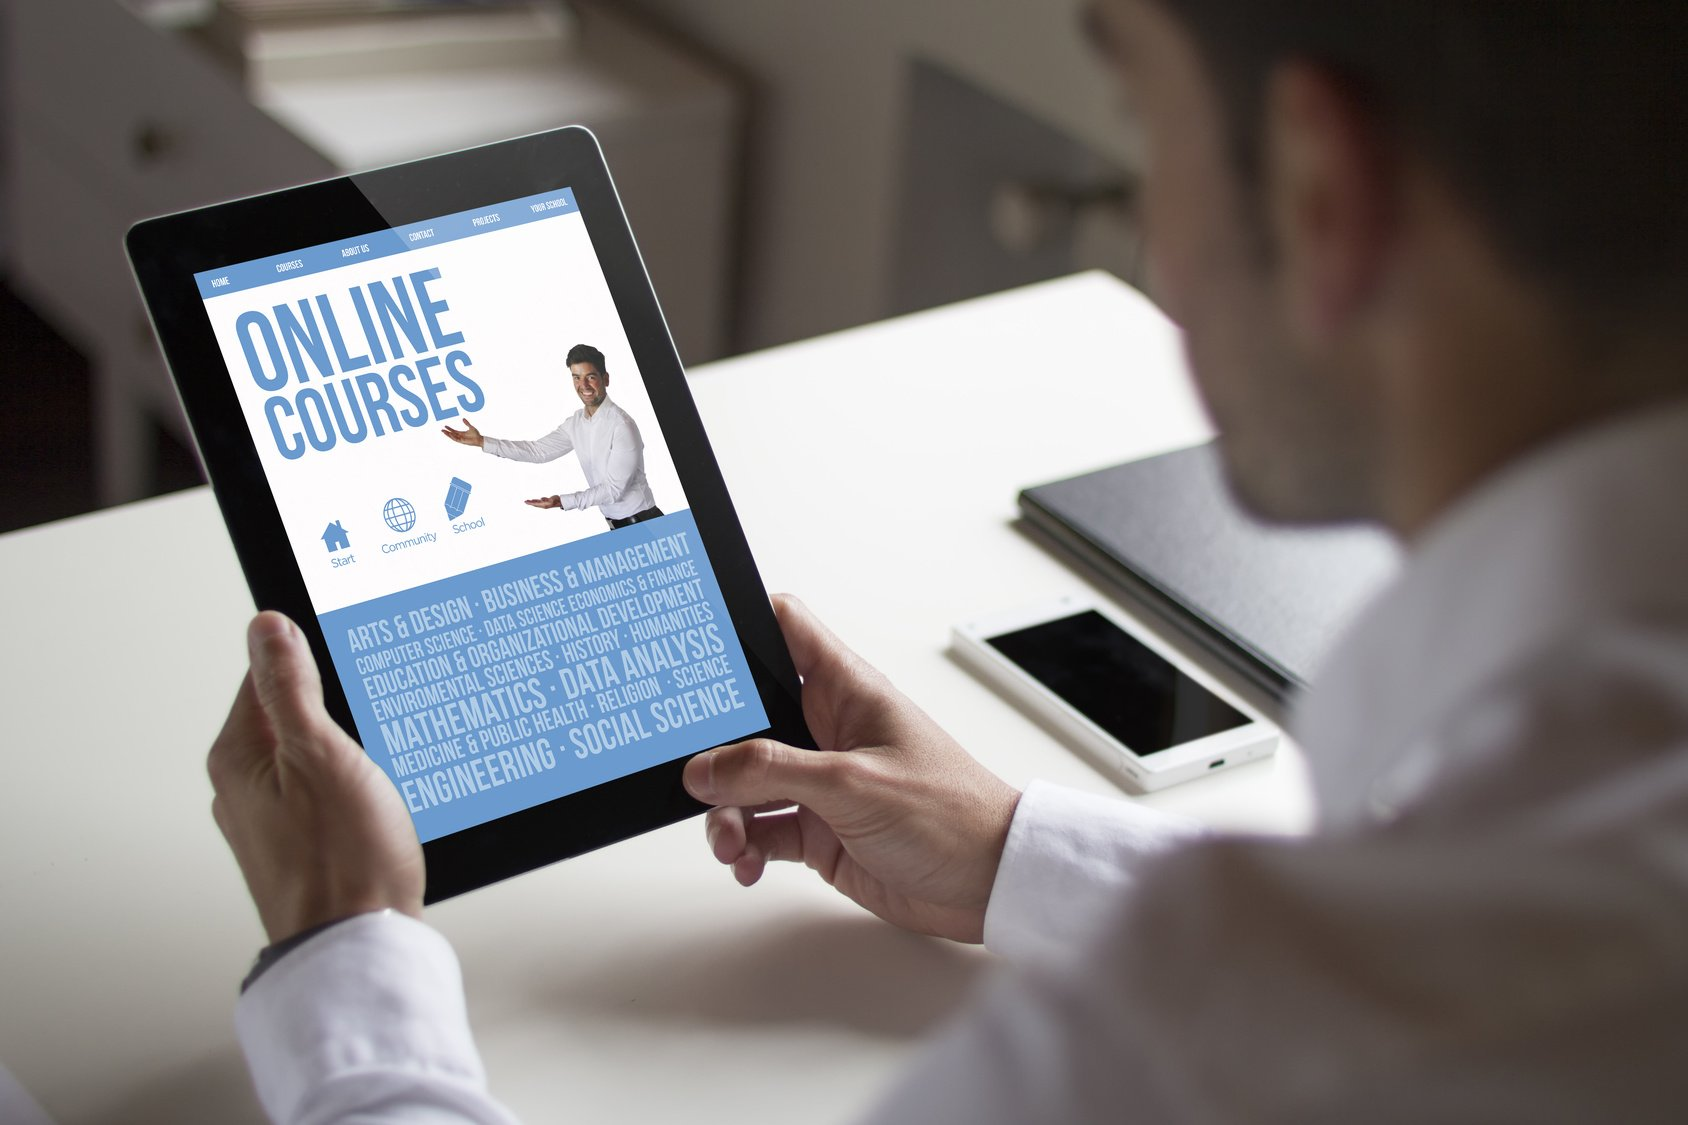



# Lead scoring case study


 
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.




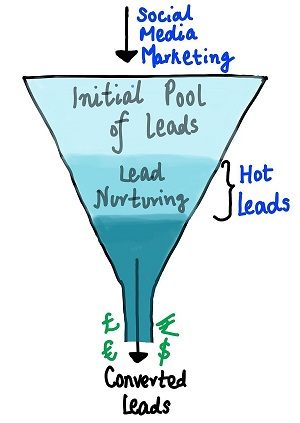



### Requirements of the company:


To select the most promising leads, in other terms 'hot leads' which are most likely into paying customers. 



### Content:

1. Around 9000 data points.


2. Attributes like Lead Source, Specialization, City, Current occupation etc.


3. The Target variable is 'Converted' which tells whether a past lead was converted or not- 1 being Yes, 0 being a No.





Source:https://www.kaggle.com/lakshmikalyan/lead-scoring-x-online-education?select=Leads+X+Education.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder

  
### EDA:


Performing Exploratory Data Analysis and undertsnading data well.


Steps:

1. Inspecting the shape, details of columns of the dataset.


2. Checking for duplicate values.


3. Checking for null values, replacing them with values, if applicable.


4. Dropping irrelavant columns.








    
    

In [2]:
leads = pd.read_csv(r'C:\Users\home\Downloads\LeadsXEducation.csv')

In [3]:
display(leads)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [4]:
type(leads)

pandas.core.frame.DataFrame

In [5]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [6]:
leads.shape

(9240, 37)

In [7]:
leads.drop_duplicates()
leads.shape

(9240, 37)

In [8]:
# removing Prospect ID as it is of no use.

leads=leads.drop(columns="Prospect ID")
leads.shape

(9240, 36)

In [9]:
#displaying all the columns 

pd.set_option('display.max_columns', None)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Observations:



1. Shape of the data: 9240 rows, 37 columns.


2. Out of which 7 are numerical and 30 are categorical columns.


3. No duplicates present.


4. A large number of 'Select' values can be seen by having a brief look at the dataset, like the columns city, Lead profile, specialization, how did you hear about X education. That means that the people have not selected any of the given options.






## Handling missing values

As there are many 'Select' values in the dataset, it is difficult to find null values. By converting them to NaN, can get hold of the same.
  
    

  
   

In [10]:
leads = leads.replace('Select', np.nan)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
#finding null values

print(leads.isnull().sum(axis=0))

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [12]:
#finding null value percentages

print(round(100*(leads.isnull().sum()/len(leads)).sort_values(ascending= False), 2))

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

Observations:

1. There are null values more than 70%.


2. The percentage of Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score and Asymmetrique Profile Score are equal.





In [13]:
# dropping columns with more than 70% of null values 

dropping_leads = leads.columns[leads.isnull().mean() > .70]

dropped_leads = leads.drop(dropping_leads,axis=1)


In [14]:
display(dropped_leads)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


For time being, dropped two columns which were having more than 70% of null values. Going forward with whatever we have now, and then decide whether dropping is a good option.


In [15]:
dropped_leads.nunique()

Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

### Observations:


1. Many columns have single digit unique values.


2. There are 5 columns with unique value being 1, with 'yes' or 'no' values. Since they contrubute nothing to the model, removing all those columns. 

    a) Magazine

    b) Receive more updates about our courses

    c) Update me on supply chain content

    d) Get updates on DM content

    e) I agree to pay the amount through check
    
    
3. There columns that are being removed have no null values.

In [16]:
dropped_leads = dropped_leads.loc[:, dropped_leads.nunique()!=1]


So in total, 7 columns have been removed from the original data.

The next highest null values are in Lead Quality column. 

In [17]:
dropped_leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

The Lead Quality column indicates the quality of leads based on data and intuition, replacing all null values with 'Not sure'.

In [18]:
dropped_leads['Lead Quality'] = dropped_leads['Lead Quality'].fillna('Not Sure')
dropped_leads['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

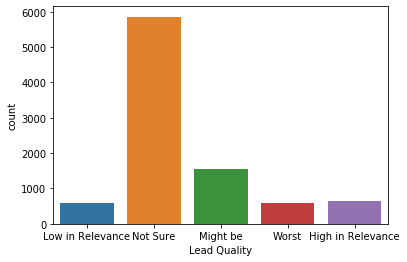

In [19]:
sns.countplot(x='Lead Quality', data=dropped_leads)

In [20]:
# After replacement of 'Not sure', the number is significantly high. So dropping Lead Quality column.

dropped_leads =dropped_leads.drop('Lead Quality', axis=1)
dropped_leads

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,02.Medium,01.High,15.0,17.0,No,Email Marked Spam
9236,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,wrong number given,Mumbai,02.Medium,01.High,14.0,19.0,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,invalid number,Mumbai,02.Medium,01.High,13.0,20.0,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,No,No,No,No,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,SMS Sent


Text(0.5, 0, 'Asymmetrique Profile Score')

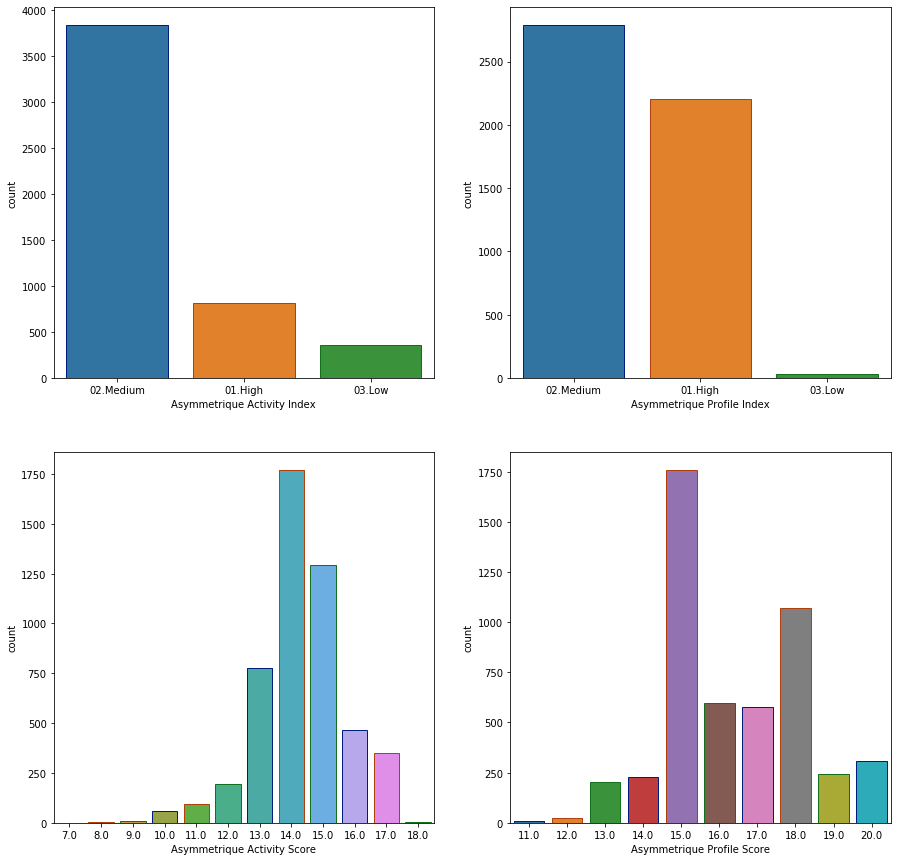

In [21]:
fig=plt.figure(figsize=(15,15))
sns.set_context( font_scale=1.8) 

ax1=fig.add_subplot(221)
ax1=sns.countplot(x='Asymmetrique Activity Index',data=dropped_leads,edgecolor=sns.color_palette("dark", 3))
ax1.set_xlabel('Asymmetrique Activity Index')


ax2=fig.add_subplot(222)
ax2=sns.countplot(x='Asymmetrique Profile Index', data=dropped_leads,edgecolor=sns.color_palette("dark", 3))
ax2.set_xlabel('Asymmetrique Profile Index')

ax3=fig.add_subplot(223)
ax3=sns.countplot(x='Asymmetrique Activity Score', data=dropped_leads,edgecolor=sns.color_palette("dark", 3))
ax3.set_xlabel('Asymmetrique Activity Score')

ax4=fig.add_subplot(224)
ax4=sns.countplot(x='Asymmetrique Profile Score', data=dropped_leads,edgecolor=sns.color_palette("dark", 3))
ax4.set_xlabel('Asymmetrique Profile Score')

In [22]:
#removing assymetrique columns as they have high null value count

dropped_leads=dropped_leads.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis = 1)
display(dropped_leads)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Email Marked Spam
9236,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,wrong number given,Mumbai,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,invalid number,Mumbai,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,No,No,No,No,No,No,NaN,Other Metro Cities,No,SMS Sent


In [23]:
#rechecking for null values

print(dropped_leads.isnull().sum(axis=0))

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [24]:
print(round(100*(dropped_leads.isnull().sum()/len(dropped_leads)).sort_values(ascending= False), 2))

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Newspaper 

In [25]:
dropped_leads.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

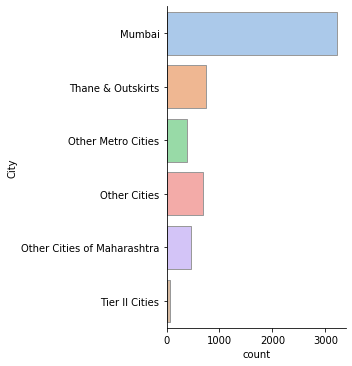

In [26]:
sns.catplot(y="City", kind="count",palette="pastel", edgecolor=".6",data=dropped_leads)

Since Mumbai has highest counts in the 'City' column, imputing the null values with 'Mumbai'

In [27]:
dropped_leads.City = dropped_leads.City.fillna('Mumbai')

In [28]:
dropped_leads.City.value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [29]:
print(round(100*(dropped_leads.isnull().sum()/len(dropped_leads)).sort_values(ascending= False), 2))

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

#### Specialization

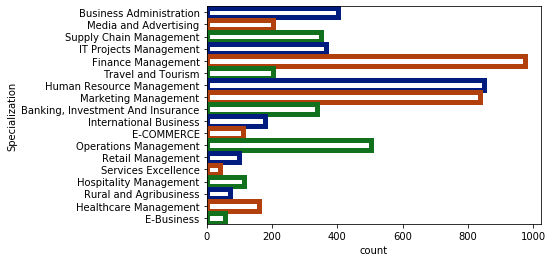

In [30]:
sns.countplot(y="Specialization", data=dropped_leads,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

The Specialization column includes several levels under 'Select specialization' category. Normally, people would choose 'other' if they do not have their own category mentioned in the form. So filling null values with 'other'.

In [31]:
dropped_leads.Specialization = dropped_leads.Specialization.fillna('Other')

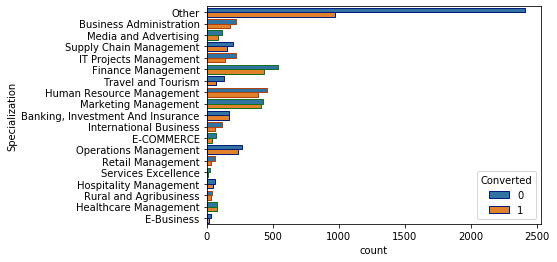

In [32]:
sns.countplot(y='Specialization',hue='Converted', data=dropped_leads,edgecolor=sns.color_palette("dark", 3))

It looks like the people had different specialization fields in their minds. It is recommended to add more fields based on the feedback by providing an extra blank space in the form so that it is easier to decide on what to add in the future.

In [33]:
#looking for next highest null value field.
print(round(100*(dropped_leads.isnull().sum()/len(dropped_leads)).sort_values(ascending= False), 2))

Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Specialization                                    0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

#### Tags

In [34]:
#understanding Tags column which indicates the current status of the lead

dropped_leads.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

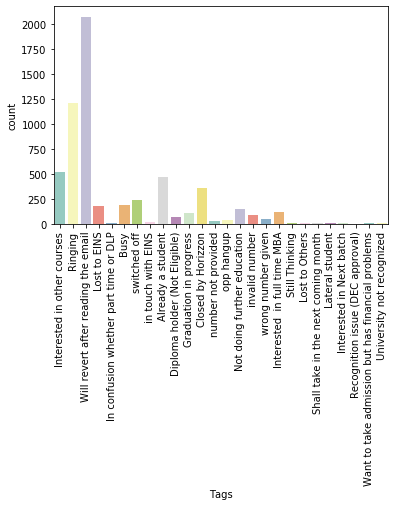

In [35]:
sns.countplot(x='Tags',data=dropped_leads,palette='Set3')
plt.xticks(rotation=90)

It looks like Tags column does not be that helpful for the model as the values can be unpredictable. So dropping it.

In [36]:
dropped_leads=dropped_leads.drop(['Tags'], axis = 1)
display(dropped_leads)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,No,Email Marked Spam
9236,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,No,No,No,No,No,No,Other Metro Cities,No,SMS Sent


#### What matters most to you in choosing a course


The next column with highest number of null values is 'What matters most to you in choosing a course'. Firstly, understanding how the data has been distributed, makes it easier to decide upon dropping or imputing. 

In [37]:
dropped_leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

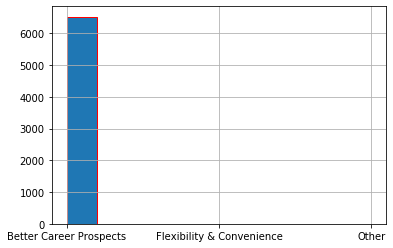

In [38]:
dropped_leads["What matters most to you in choosing a course"].hist(edgecolor = "red");

The distribution seems like almost equal to those 'yes' or 'no' columns, skewed towards one value and it does not contribute anything to the model. So dropping it.

In [39]:
dropped_leads=dropped_leads.drop(['What matters most to you in choosing a course'], axis = 1)
display(dropped_leads)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Other,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Other,Unemployed,No,No,No,No,No,No,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Other,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,No,No,No,No,No,No,Mumbai,No,Email Marked Spam
9236,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,No,No,No,No,No,No,Mumbai,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,No,No,No,No,No,No,Mumbai,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,NaN,No,No,No,No,No,No,Other Metro Cities,No,SMS Sent


#### What is your current occupation

In [40]:
dropped_leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

The column has several categories. One of the categories 'other' could be a social worker without pay, being in armed forces, retired, etc,. So filling null values with 'Other'.

In [41]:
dropped_leads['What is your current occupation'] = dropped_leads['What is your current occupation'].fillna('Other')

In [42]:
print(round(100*(dropped_leads.isnull().sum()/len(dropped_leads)).sort_values(ascending= False), 2))

Country                                   26.63
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
A free copy of Mastering The Interview     0.00
Lead Origin                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
Total Time Spent on Website                0.00
Last Notable Activity                      0.00
Specialization                             0.00
What is your current occupation            0.00
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
City                                    

#### Country

In [43]:
dropped_leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Germany                    4
South Africa               4
Kuwait                     4
Canada                     4
Sweden                     3
Italy                      2
Netherlands                2
Belgium                    2
Ghana                      2
Bangladesh                 2
Philippines                2
China                      2
Uganda                     2
Asia/Pacific Region        2
Malaysia                   1
Russia                     1
Sri Lanka                  1
Kenya                      1
Vietnam                    1
Switzerland                1
Liberia       

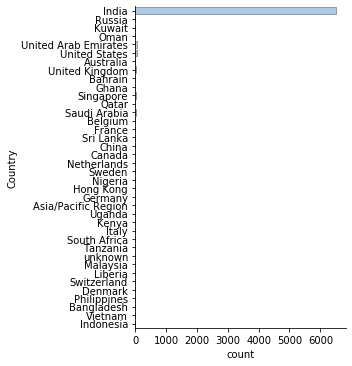

In [44]:
sns.catplot(y="Country",  kind="count",palette="pastel", edgecolor=".6",data=dropped_leads)

Similar to what happened previously, this column is highly skewd towards India. As this does not help in any way, dropping it.

In [45]:
dropped_leads=dropped_leads.drop(['Country'], axis = 1)
display(dropped_leads)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Other,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Other,Unemployed,No,No,No,No,No,No,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Other,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,No,No,No,No,No,No,Mumbai,No,Email Marked Spam
9236,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,No,No,No,No,No,No,Mumbai,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,No,No,No,No,No,No,Mumbai,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other,No,No,No,No,No,No,Other Metro Cities,No,SMS Sent


In [46]:
print(dropped_leads.isnull().sum(axis=0))

Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
Specialization                              0
What is your current occupation             0
Search                                      0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64


In [47]:
#looking for next highest null value field.
print(round(100*(dropped_leads.isnull().sum()/len(dropped_leads)).sort_values(ascending= False), 2))

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Last Notable Activity                     0.00
Lead Origin                               0.00
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Specialization                            0.00
A free copy of Mastering The Interview    0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
City                                      0.00
Lead Number                               0.00
dtype: float6

So far, some of the columns with high null values were imputed and some of them dropped because of high skewness. Now that we are left with few more columns having null values. One of them seems important, which is 'Lead Source'. 




In [48]:
dropped_leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
NC_EDM                  1
testone                 1
blog                    1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
Name: Lead Source, dtype: int64

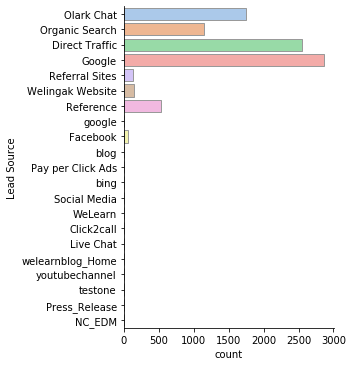

In [49]:
sns.catplot(y="Lead Source", kind="count",palette="pastel", edgecolor=".6",data=dropped_leads)

#### Imputing missing values with mode

Filling missing values with mode which is 'Google' in this case.  By capitalizing every first alphabet, the count in 'google goes to 'Google'. So that it avoides unnecessary confusion.

In [50]:
dropped_leads["Lead Source"]=dropped_leads["Lead Source"].str.capitalize()

In [51]:
#filling missing values with the mode

dropped_leads['Lead Source'] = dropped_leads['Lead Source'].fillna('Google')
dropped_leads['Lead Source'].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Press_release           2
Live chat               2
Social media            2
Nc_edm                  1
Welearn                 1
Blog                    1
Testone                 1
Welearnblog_home        1
Pay per click ads       1
Youtubechannel          1
Name: Lead Source, dtype: int64

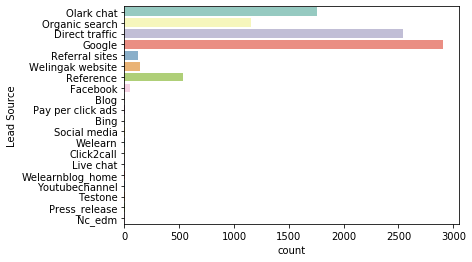

In [52]:
sns.countplot(y='Lead Source',data=dropped_leads,palette='Set3')

In [53]:
print(dropped_leads.isnull().sum(axis=0))

Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                             103
Specialization                              0
What is your current occupation             0
Search                                      0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64


#### Dropping missing values

Since we have a very less missing values, dropping all those.

In [54]:
dropped_leads=dropped_leads.dropna()

In [55]:
print(dropped_leads.isnull().sum(axis=0))

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64


In [56]:
leads_report = sv.analyze(dropped_leads)

:FEATURES DONE:                    |█████████████████████| [100%]   00:05  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:03  -> (00:00 left)


Creating Associations graph... DONE!


In [57]:
leads_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


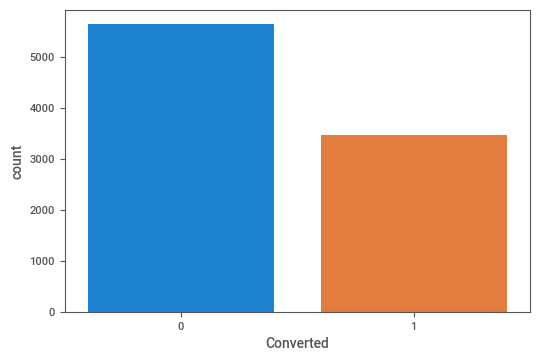

In [58]:
sns.countplot(x='Converted',  data=dropped_leads)

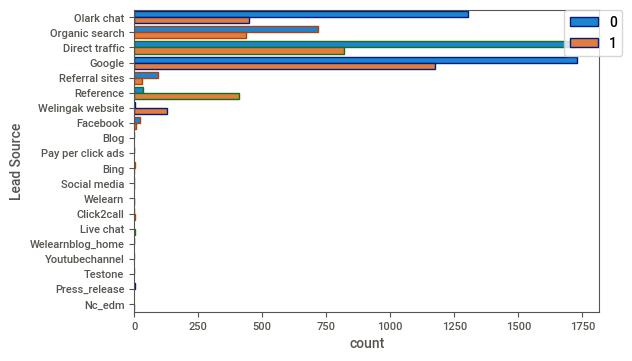

In [59]:
sns.countplot(y='Lead Source',hue='Converted', data=dropped_leads,edgecolor=sns.color_palette("dark", 3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)

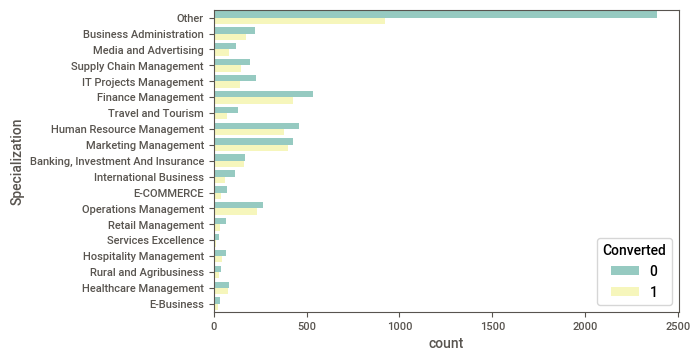

In [60]:
sns.countplot(y='Specialization',hue='Converted',data=dropped_leads,palette='Set3')

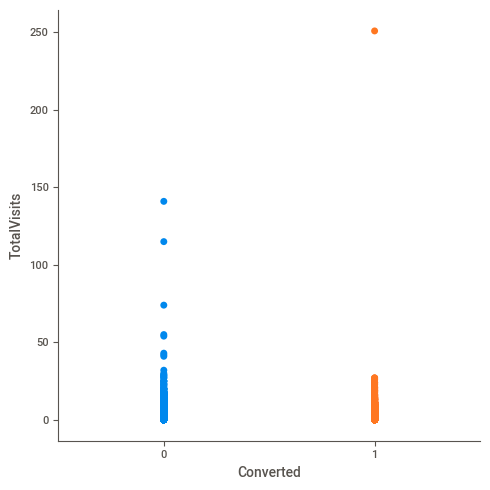

In [61]:
sns.catplot(y="TotalVisits", x="Converted", jitter=False, data=dropped_leads)


Though the Total visits are high in number, the positive responses are less.

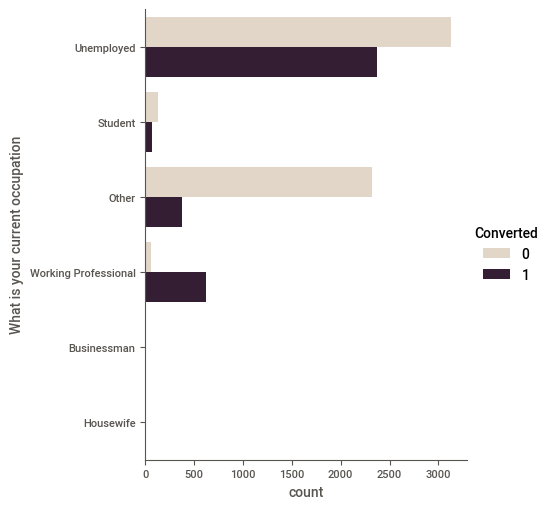

In [62]:
sns.catplot(y="What is your current occupation",hue='Converted', kind="count", palette="ch:.25", data=dropped_leads)


Checking 'Yes' or 'No' categorical columns whether they are skewed. If yes, dropping those columns.

1. Do Not Email


2. Do Not Call


3. Search


4. Newspaper Article


5. X Education Forums


6. Newspaper


7. Digital Advertisement


8. Through Recommendations


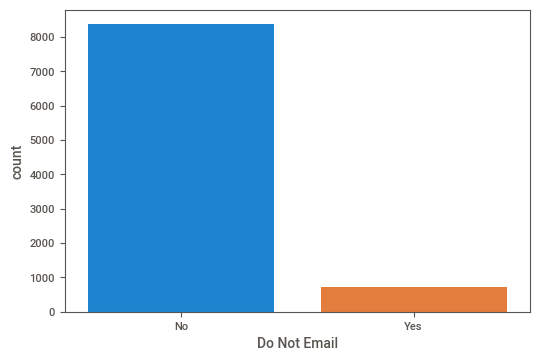

In [63]:
sns.countplot(x='Do Not Email', data=dropped_leads)

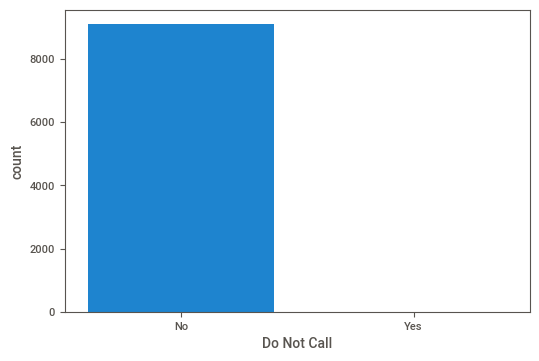

In [64]:
sns.countplot(x='Do Not Call', data=dropped_leads)

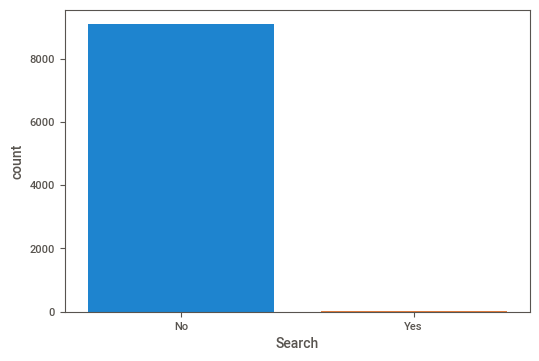

In [65]:
sns.countplot(x='Search', data=dropped_leads)

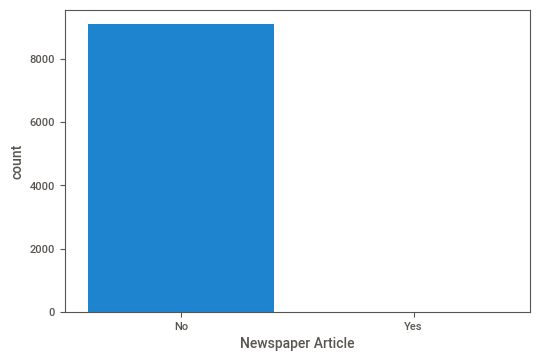

In [66]:
sns.countplot(x='Newspaper Article', data=dropped_leads)

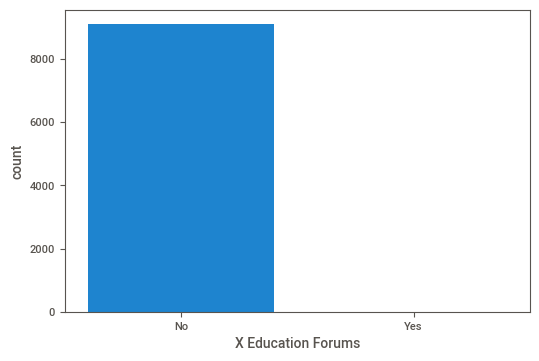

In [67]:
sns.countplot(x='X Education Forums', data=dropped_leads)

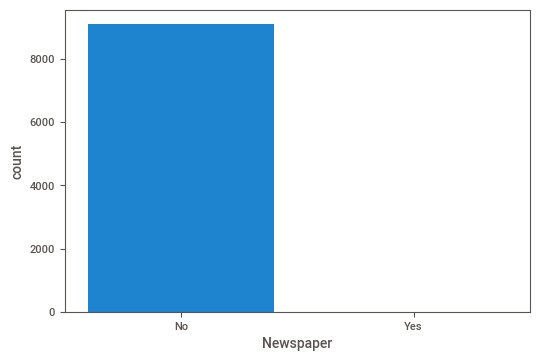

In [68]:
sns.countplot(x='Newspaper', data=dropped_leads)

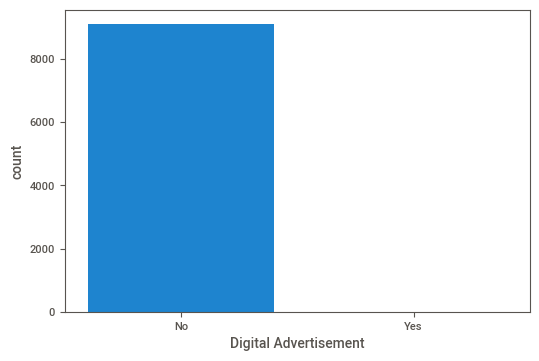

In [69]:
sns.countplot(x='Digital Advertisement', data=dropped_leads)

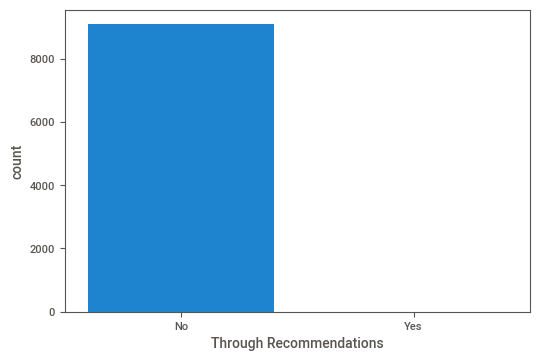

In [70]:
sns.countplot(x='Through Recommendations', data=dropped_leads)

In [71]:
# dropping all the above highly skewed columns 

dropped_leads=dropped_leads.drop(['Do Not Email', 'Do Not Call','Search', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'], axis = 1) 
dropped_leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai,No,Modified
1,660728,API,Organic search,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai,No,Modified


#### Dummies!

Creating dummies for categorical columns.

In [72]:
dummy_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']
dummy_df = pd.get_dummies(dropped_leads[dummy_columns],drop_first=True)
dummy_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [73]:
dropped_leads['A free copy of Mastering The Interview'] = dropped_leads['A free copy of Mastering The Interview'].map(dict(Yes=1, No=0))
dropped_leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai,0,Modified
1,660728,API,Organic search,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai,0,Modified


#### combining original with dummy set

In [74]:
final_leads= dropped_leads.copy()
final_leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai,0,Modified
1,660728,API,Organic search,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai,0,Email Opened
2,660727,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,Mumbai,0,Modified


In [75]:
final_leads=pd.concat([final_leads, dummy_df], axis=1)
final_leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark chat,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Mumbai,0,Modified,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic search,0,5.0,674,2.5,Email Opened,Other,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Goog

In [76]:
final_leads.shape

(9103, 94)

In [77]:
final_leads.drop(columns=['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'], inplace=True)

In [78]:
final_leads.shape

(9103, 87)

In [79]:
X_22 = final_leads.drop('Converted',axis=1).to_numpy()
y_pred=final_leads['Converted'].to_numpy()

In [80]:
X_22.shape

(9103, 86)

In [81]:
y_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

### Reducing dimensionality using PCA

In [82]:
pca=PCA(n_components=10)
pca.fit(X_22)
X=pca.transform(X_22)


In [83]:
X

array([[ 4.37090452e+04, -5.00258172e+02, -3.07731877e+00, ...,
        -8.53277821e-01,  4.94787859e-01, -1.55308947e-01],
       [ 4.37003366e+04,  1.73757138e+02,  8.91870318e-01, ...,
        -1.05171246e-01,  9.66071367e-01,  3.02046549e-01],
       [ 4.36997076e+04,  1.03174913e+03, -3.99670627e+00, ...,
         4.73177845e-01,  4.14363097e-01, -7.57254551e-02],
       ...,
       [-3.74828612e+04, -2.66145093e+02, -6.40813515e-01, ...,
         2.53817960e-01,  1.10588882e-01, -4.07271580e-01],
       [-3.74897315e+04,  3.38600027e+01, -1.28850623e-01, ...,
         1.08712505e+00, -1.06514193e+00, -1.24210982e-01],
       [-3.74943942e+04,  8.13865774e+02,  1.06040391e+00, ...,
        -6.32843321e-01,  2.83610686e-01, -6.86968980e-02]])

In [84]:
X.shape

(9103, 10)

In [85]:
df = pd.DataFrame(data=np.c_[X, y_pred], columns=['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8', 'Feature 9','Feature 10','Label'])

In [86]:
df

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Label
0,43709.045153,-500.258172,-3.077319,1.398111,0.519132,-0.075865,0.059639,-0.853278,0.494788,-0.155309,0.0
1,43700.336609,173.757138,0.891870,0.617936,-0.513176,0.526675,-0.886447,-0.105171,0.966071,0.302047,0.0
2,43699.707556,1031.749128,-3.996706,0.892418,-1.367108,-0.465243,0.554492,0.473178,0.414363,-0.075725,1.0
3,43691.177033,-195.247154,-2.486274,0.644972,-0.070925,-1.093398,0.587218,-0.793962,-0.093716,-0.141270,0.0
4,43653.662595,927.767628,-4.052486,1.917392,0.492855,0.114218,0.133046,-1.006793,-0.445155,-0.290127,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9098,-37463.149493,1379.853993,1.649550,1.734624,-0.156386,-0.031979,0.187276,-0.500561,0.247276,-0.255463,1.0
9099,-37481.844344,-227.145652,-0.728173,-0.490538,0.152697,-1.498049,-0.052307,0.246247,0.140537,-0.396440,0.0
9100,-37482.861206,-266.145093,-0.640814,-0.523742,0.138268,-1.521840,-0.051873,0.253818,0.110589,-0.407272,0.0
9101,-37489.731476,33.860003,-0.128851,-0.924536,0.767738,0.035448,0.036186,1.087125,-1.065142,-0.124211,1.0


In [87]:
y = (2 * LabelEncoder().fit_transform(y_pred)) - 1

In [88]:
y

array([-1, -1,  1, ..., -1,  1,  1], dtype=int64)

### Splitting dataset into train and test

In [89]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0)

### Building Logistic Regression Model

In [90]:
logreg = LogisticRegression()

In [91]:
logreg.fit(X_train, y_train)

C:\Users\home\anaconda3\ANACONDA3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
yhat_train = logreg.predict(X_train)

In [93]:
accuracy_score(yhat_train, y_train)

0.7909604519774012

In [94]:
yhat_test = logreg.predict(X_test)
accuracy_score(yhat_test, y_test)

0.7868912486268766

### Conclusion:


The model is built using important features and is not overfitting or underfitting with the accuracy being 77%.

Most applicants have an aspiration to join course keeping career prospects in their mind. 

Their is a positive response to 'Reference' lead. Keeping that in mind, the sales team has to focus on Google and Olark chat to improve the business.


There is a good response from both 'Unemployed' and 'Working Professional' customers, probably one in search of jobs and the latter in updating the skills. It is good if the X company could get some important business contacts or some job preparation methods.










